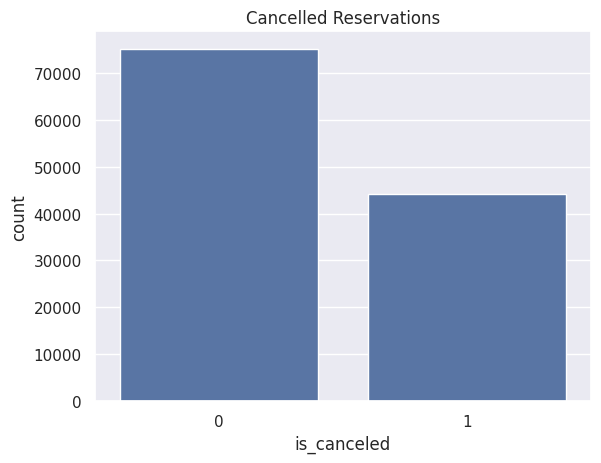

<ipython-input-1-74d5a9fde68c>:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_checkout['arrival_date_month_number'] = df_checkout['arrival_date_month'].map(month_dict)


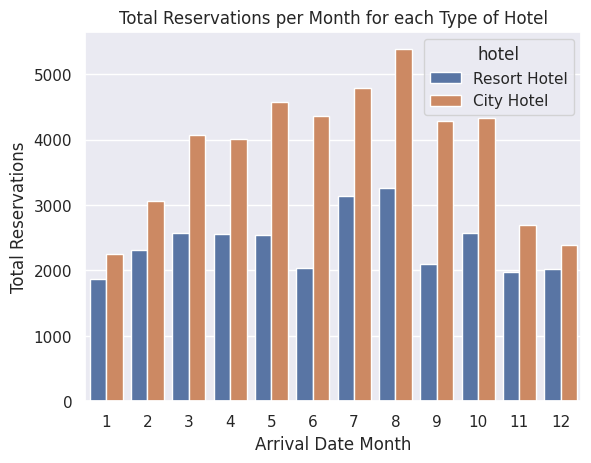

<ipython-input-1-74d5a9fde68c>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_checkout['arrival_date'] = (
<ipython-input-1-74d5a9fde68c>:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_checkout['arrival_date'] = pd.to_datetime(df_checkout['arrival_date'])


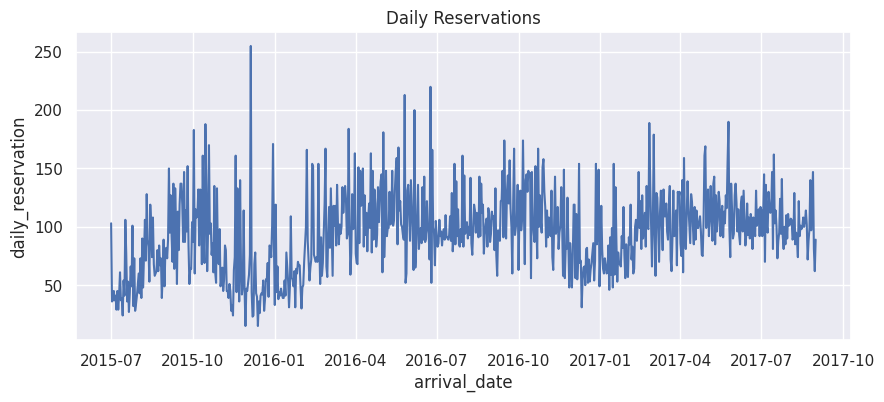

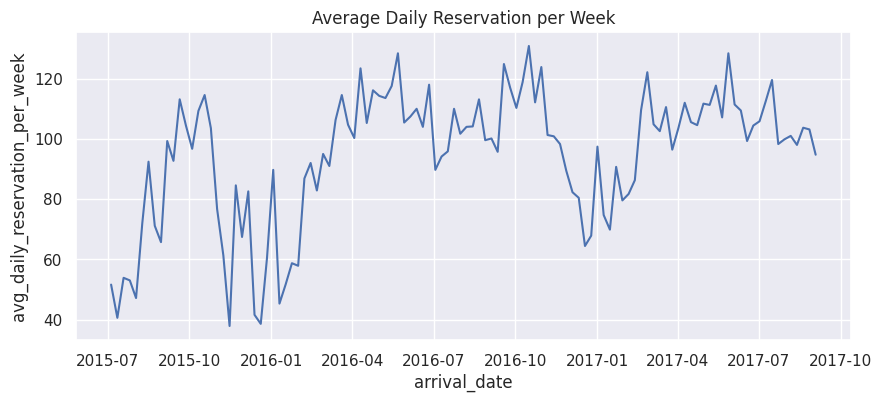

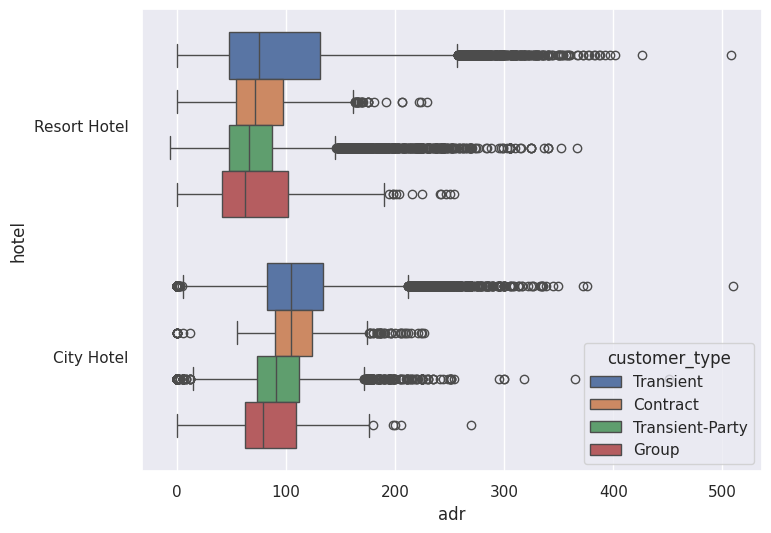

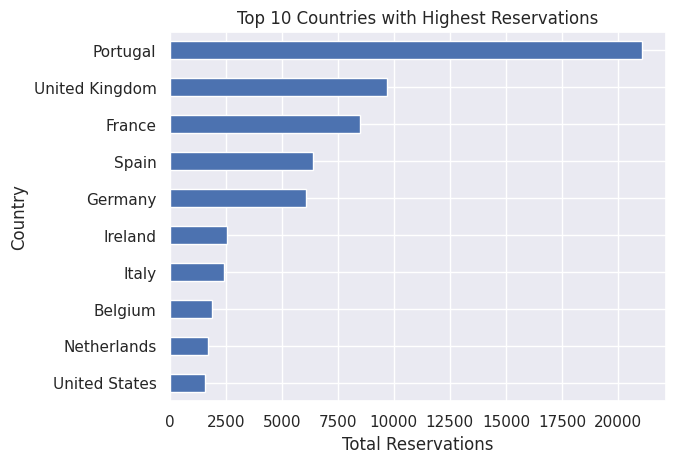

<ipython-input-1-74d5a9fde68c>:125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_checkout['total_guest'] = df_checkout.adults + df_checkout.children + df_checkout.babies


,46619
id,46619
hotel,City Hotel
is_canceled,0
lead_time,37
arrival_date_year,2016
arrival_date_month,January
arrival_date_week_number,3
arrival_date_day_of_month,12
stays_in_weekend_nights,0
stays_in_week_nights,2


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import calendar
sns.set()

# Load dataset
df_hotels = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-02-11/hotels.csv')

# Add unique identifier
df_hotels = df_hotels.reset_index().rename(columns={'index': 'id'})

# Function to check data types, null values, and unique values
def check_values(df):
    data = []
    for column in df.columns:
        data.append([
            column,
            df[column].dtype,
            df[column].isna().sum(),
            round(100 * (df[column].isna().sum() / len(df)), 2),
            df[column].nunique()
        ])
    return pd.DataFrame(columns=['Data_Features', 'Data_Type', 'Null', 'Null_Percentage', 'Unique_Value'], data=data)

# Check the dataset structure
check_values(df_hotels)

# Count reservation cancellations
df_hotels.is_canceled.value_counts()
df_hotels.is_canceled.value_counts(normalize=True)

# Visualizing cancellations
sns.countplot(data=df_hotels, x='is_canceled')
plt.title('Cancelled Reservations')
plt.show()

# Percentage of cancellations for City Hotel
city_cancel_rate = round(100 * (len(df_hotels[(df_hotels.hotel == 'City Hotel') & (df_hotels.is_canceled == 1)]) /
                                len(df_hotels[df_hotels.hotel == 'City Hotel'])), 2)

# Percentage of cancellations for Resort Hotel
resort_cancel_rate = round(100 * (len(df_hotels[(df_hotels.hotel == 'Resort Hotel') & (df_hotels.is_canceled == 1)]) /
                                  len(df_hotels[df_hotels.hotel == 'Resort Hotel'])), 2)

# Filtering only completed checkouts
df_checkout = df_hotels[df_hotels.is_canceled == 0]

# Reservations per month
df_checkout.groupby(['hotel', 'arrival_date_month'])['id'].nunique()

# Mapping month names to numbers
month_dict = {month: index for index, month in enumerate(calendar.month_name) if month}
df_checkout['arrival_date_month_number'] = df_checkout['arrival_date_month'].map(month_dict)

# Visualizing monthly reservations
sns.countplot(data=df_checkout, x='arrival_date_month_number', hue='hotel')
plt.xlabel('Arrival Date Month')
plt.ylabel('Total Reservations')
plt.title('Total Reservations per Month for each Type of Hotel')
plt.show()

# Creating a full arrival date column
df_checkout['arrival_date'] = (
    df_checkout['arrival_date_year'].astype('str') + '-' +
    df_checkout.arrival_date_month_number.astype('str').str.pad(2, fillchar='0') + '-' +
    df_checkout.arrival_date_day_of_month.astype('str').str.pad(2, fillchar='0')
)

# Convert to datetime
df_checkout['arrival_date'] = pd.to_datetime(df_checkout['arrival_date'])

# Daily reservations
df_daily_reservation = df_checkout.resample('D', on='arrival_date').size().reset_index().rename(columns={0: 'daily_reservation'})

# Plot daily reservations
plt.figure(figsize=(10, 4))
sns.lineplot(data=df_daily_reservation, x='arrival_date', y='daily_reservation')
plt.title('Daily Reservations')
plt.show()

# Weekly average reservations
df_avg_daily_reservation_per_week = round(
    df_checkout.resample('D', on='arrival_date').size().reset_index().rename(columns={0: 'avg_daily_reservation_per_week'})
    .resample('W', on='arrival_date')['avg_daily_reservation_per_week'].mean().reset_index(), 2)

# Plot weekly average reservations
plt.figure(figsize=(10, 4))
sns.lineplot(data=df_avg_daily_reservation_per_week, x='arrival_date', y='avg_daily_reservation_per_week')
plt.title('Average Daily Reservation per Week')
plt.show()

# Average ADR per hotel and customer type
round(df_checkout.groupby(['hotel', 'customer_type'])['adr'].mean(), 2)

# Boxplot for ADR distribution
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_checkout, x='adr', y='hotel', hue='customer_type')
plt.show()

# Load country dataset
df_country = pd.read_csv('https://gist.githubusercontent.com/tadast/8827699/raw/f5cac3d42d16b78348610fc4ec301e9234f82821/countries_codes_and_coordinates.csv')

# Adjust country code format
df_country['code'] = df_country['Alpha-3 code'].str.replace('"', '').str.strip()

# Merge country data
df_merged = pd.merge(df_checkout[['id', 'country']], df_country[['Country', 'code']],
                     left_on='country', right_on='code', indicator=True, how='left')

# Top 10 countries with highest reservations
df_merged.Country.value_counts().head(10)

# Plot top 10 countries with highest reservations
df_merged.Country.value_counts().head(10).sort_values(ascending=True).plot.barh()
plt.xlabel('Total Reservations')
plt.ylabel('Country')
plt.title('Top 10 Countries with Highest Reservations')
plt.show()

# Create total guests column
df_checkout['total_guest'] = df_checkout.adults + df_checkout.children + df_checkout.babies

# Average guests per reservation
round(df_checkout.total_guest.mean(), 0)

# Maximum number of guests in a reservation
df_checkout.total_guest.max()

# Display reservation with highest number of guests
df_checkout[df_checkout.total_guest == df_checkout.total_guest.max()].T
